In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Loading the data 
df1 = pd.read_csv('D:/HousePricePredictionAssignment/train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5       2003  \
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# IdentifyNumber of rows & columns 
df1.shape


(1460, 81)

In [4]:
#Check the dataframe and explore data fields
df1.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave   NaN      Reg  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [5]:
#Describe 
df1.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual   
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  \
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  \
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF   
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  \
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath   
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  \
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  \
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF   
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000  \
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#Step 1- EDA
##Checking the null values in percentage
print('Percentage of Missing Values in each column is as follows:')
print(round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending=False)[ round(df1.isnull().sum()/len(df1.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


In [7]:
#Observations
# 1) Out of 81 columns, 18 columns are having null values 
# 2) six columns are having missing values more than 15%
# 3) Remaining 12 columns having missing values less than 6%

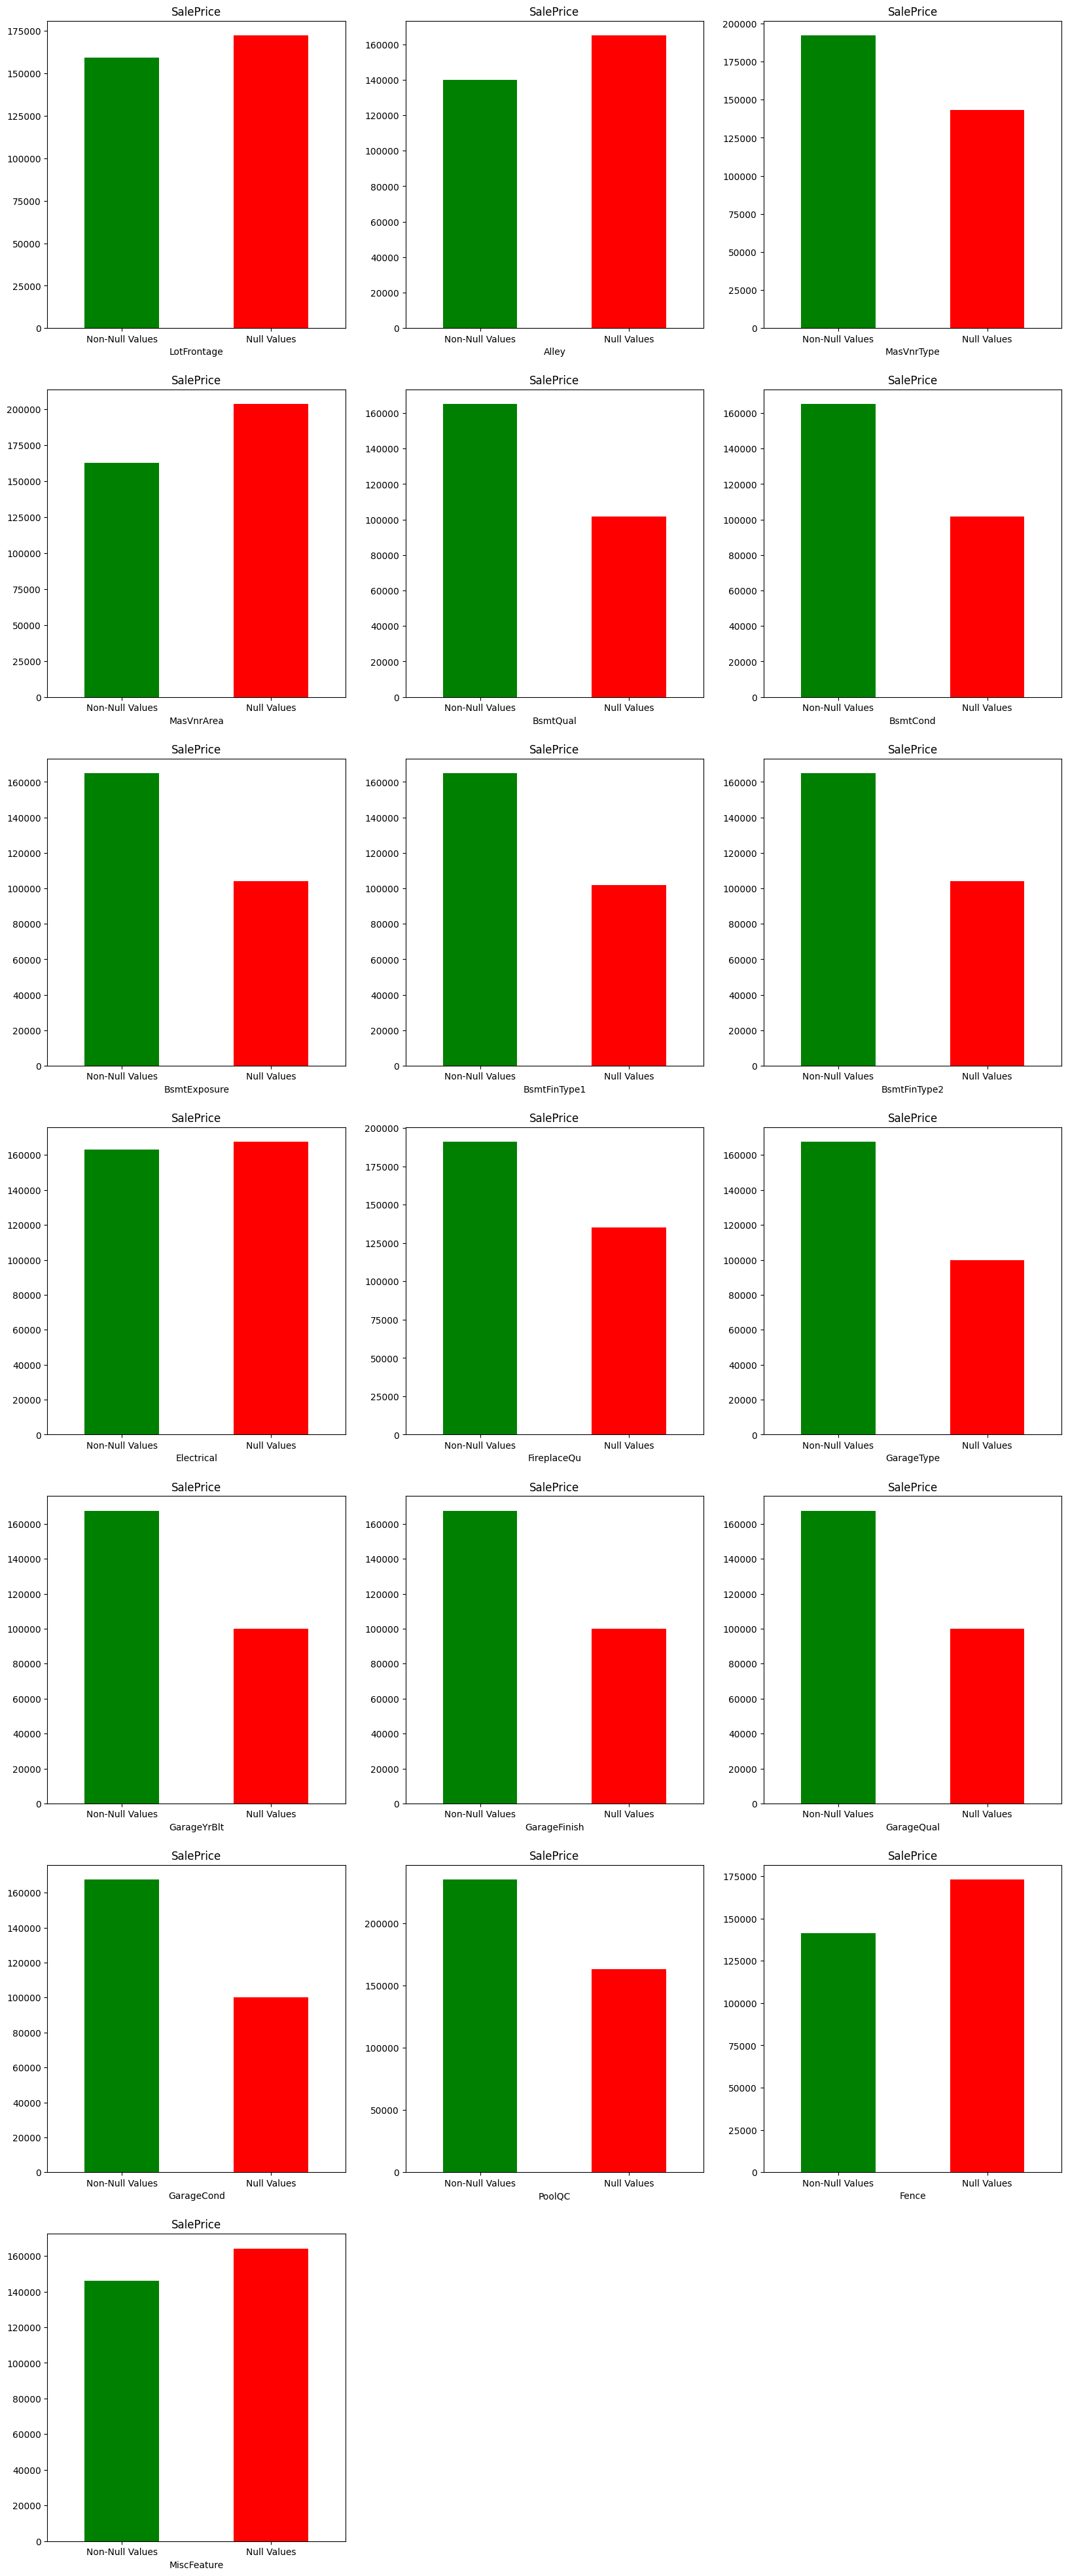

In [8]:
# Inspect if Null Values having any impact 
nan_columns = []
for j in df1.columns:
    if df1[j].isnull().sum() > 0:
        nan_columns.append(j)
df1_copy = df1.copy()    
fig,axs1= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for j,ax in zip(nan_columns,axs1.flatten()):    
    df1_copy[j] = np.where(df1_copy[j].isnull(), 'Null Values', 'Non-Null Values') 
    df1_copy.groupby(j)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
axs1[6,1].set_axis_off()    
axs1[6,2].set_axis_off() 
plt.show()

In [9]:
#Observation - The Null values have impact on the Sale Price. 

In [10]:
# Find the number of numerical and categorical columns
numerical_col = []
categorical_col = []
for i in df1.columns:
    if df1[i].dtypes != 'O':
        numerical_col.append(i)
    else:
        categorical_col.append(i)
print('Total of', len(numerical_col) ,'numerical columns')
print('Total of', len(categorical_col), 'categorical columns')

Total of 38 numerical columns
Total of 43 categorical columns


Text(0.5, 1.0, 'Median House Price Versus YearSold')

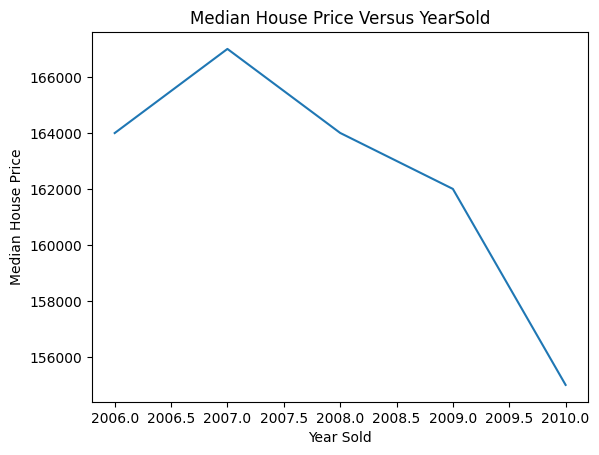

In [11]:
# find the median price changes 
df1['YrSold'] = df1['YrSold'].astype('int')
df1.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("Median House Price Versus YearSold")

In [12]:
#Observation 
#From above graph, median price started to decrease after 2007, the  decline started from 2007 

In [13]:
# Combine Year Field and check how the price varies vs year of building
year_cols = []
for i in df1.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        year_cols.append(i)
print('List of features with Year are:')
print(year_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


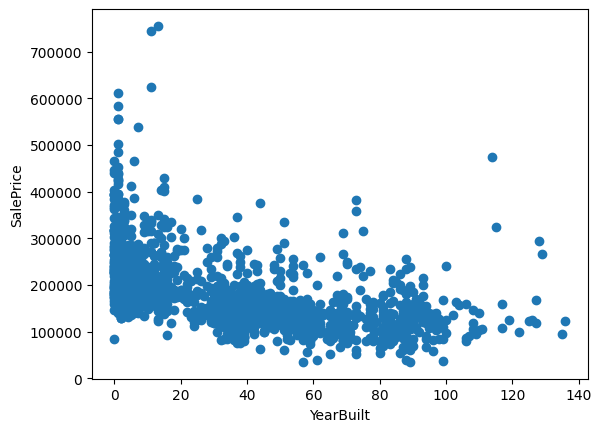

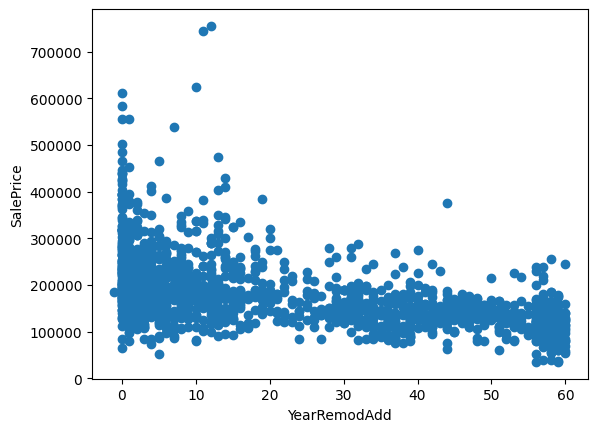

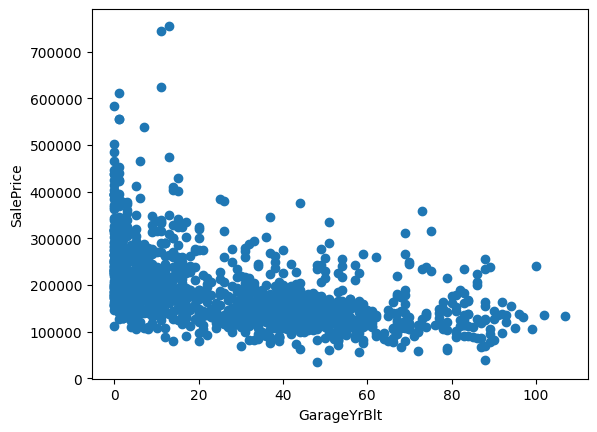

In [14]:
# Using the above year_cols and compare versus the Sale Price
for feature in year_cols:
    if feature!='YrSold':
        data1=df1.copy()
        data1[feature]=data1['YrSold']-data1[feature]
        plt.scatter(data1[feature],data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [15]:
#Observation - Based on above graphs,the new properties are costlier 

In [16]:
#Step 2 in EDA - Data cleansing & preparation
df1.drop('Id', axis=1, inplace=True)

In [17]:
# Creating a new column for the age of the property
df1['age']=df1['YrSold']-df1['YearBuilt']
df1['garage_age'] = df1['YrSold'] - df1['GarageYrBlt']
df1['remodel_age'] = df1['YrSold'] - df1['YearRemodAdd']

df1.drop('GarageYrBlt',axis=1,inplace=True)

In [18]:
# Check the latest info 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
# convert few fields related to Year into String 
df1[['MSSubClass']] = df1[['MSSubClass']].astype(str) 
df1['YrSold'] = df1['YrSold'].astype(str)
df1['MoSold'] = df1['MoSold'].astype(str)
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour   
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl  \
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType   
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam  \
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle   
0     2Story            7            5       2003          2003     Gable  \
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond   
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA  \
1  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1   
0      PConc       Gd       TA           No          GLQ         706  \
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC   
0          Unf           0        150          856    GasA        Ex  \
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea   
0          Y      SBrkr       856       854             0       1710  \
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr   
0             1             0         2         1             3             1  \
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType   
0          Gd             8        Typ           0         NaN     Attchd  \
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

In [20]:
#check the count of Numerical & Categorical 
numerical_col = []
categorical_col = []
for i in df1.columns:
    if df1[i].dtypes != 'O':
        numerical_col.append(i)
    else:
        categorical_col.append(i)
print('Total of', len(numerical_col) ,'numerical columns')
print('Total of', len(categorical_col), 'categorical columns')

Total of 36 numerical columns
Total of 46 categorical columns


In [21]:
# Checking list of columns with Missing/Null Values/Nan again
print(round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending=False)[ round(df1.isnull().sum()/len(df1.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageFinish     5.55
GarageCond       5.55
GarageType       5.55
garage_age       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


In [22]:
#Change based on above listing
df1['PoolQC'] = df1['PoolQC'].fillna('None')
df1['MiscFeature'] = df1['MiscFeature'].fillna('None')
df1['Alley'] = df1['Alley'].fillna('None')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('None')
df1['LotFrontage'] = df1.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df1['Fence'] = df1['Fence'].fillna('None')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('None')
df1['GarageCond'] = df1['GarageCond'].fillna('None')
df1['GarageType'] = df1['GarageType'].fillna('None')
df1['GarageFinish'] = df1['GarageFinish'].fillna('None')
df1['GarageQual'] = df1['GarageQual'].fillna('None')
df1['garage_age'] = df1['GarageQual'].fillna(0)  
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('None')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('None')
df1['BsmtCond'] = df1['BsmtCond'].fillna('None')
df1['BsmtQual'] = df1['BsmtQual'].fillna('None')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('None')
df1['MasVnrType'] = df1['MasVnrType'].fillna('None')
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)

In [23]:
# Checking list of columns with Missing/Null Values/Nan again
print(round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending=False)[ round(df1.isnull().sum()/len(df1.index),2) > 0 ] )

Series([], dtype: float64)


In [24]:
round(df1.isnull().sum()/len(df1.index)*100,5).sort_values(ascending=False)

Electrical       0.06849
GarageQual       0.00000
GarageCars       0.00000
GarageFinish     0.00000
GarageType       0.00000
FireplaceQu      0.00000
Fireplaces       0.00000
Functional       0.00000
TotRmsAbvGrd     0.00000
KitchenQual      0.00000
KitchenAbvGr     0.00000
BedroomAbvGr     0.00000
HalfBath         0.00000
FullBath         0.00000
BsmtHalfBath     0.00000
BsmtFullBath     0.00000
GrLivArea        0.00000
LowQualFinSF     0.00000
2ndFlrSF         0.00000
GarageArea       0.00000
GarageCond       0.00000
MSZoning         0.00000
PavedDrive       0.00000
garage_age       0.00000
age              0.00000
SalePrice        0.00000
SaleCondition    0.00000
SaleType         0.00000
YrSold           0.00000
MoSold           0.00000
MiscVal          0.00000
MiscFeature      0.00000
Fence            0.00000
PoolQC           0.00000
PoolArea         0.00000
ScreenPorch      0.00000
3SsnPorch        0.00000
EnclosedPorch    0.00000
OpenPorchSF      0.00000
WoodDeckSF       0.00000


In [25]:
# Filling the Electrical 
df1['Electrical'] = df1['Electrical'].fillna(df1['Electrical'].mode()[0])
round(df1.isnull().sum()/len(df1.index)*100,5).sort_values(ascending=False)

MSSubClass       0.0
GarageQual       0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
GarageArea       0.0
GarageCond       0.0
MSZoning         0.0
PavedDrive       0.0
garage_age       0.0
age              0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolQC           0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle   

In [26]:
#Checking for redundant values 
print(df1['PoolQC'].value_counts())
print(df1['Utilities'].value_counts())
print(df1['Street'].value_counts())

PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


In [27]:
# Remove redundant ones
def redundant_cols(df1):
    redundant = []
    for i in df1.columns:
        counts = df1[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df1) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [28]:
redundant_cols = redundant_cols(df1)
redundant_cols

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [29]:
df1.drop(redundant_cols,axis=1,inplace=True)
df1.shape

(1460, 78)

In [30]:

def drop_outliers_column(x):
    list = []
    out_columns = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in out_columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df1 = drop_outliers_column(df1)
df1.shape

(1455, 78)

In [31]:
#Check the shape of dataframe
df1.shape

(1455, 78)

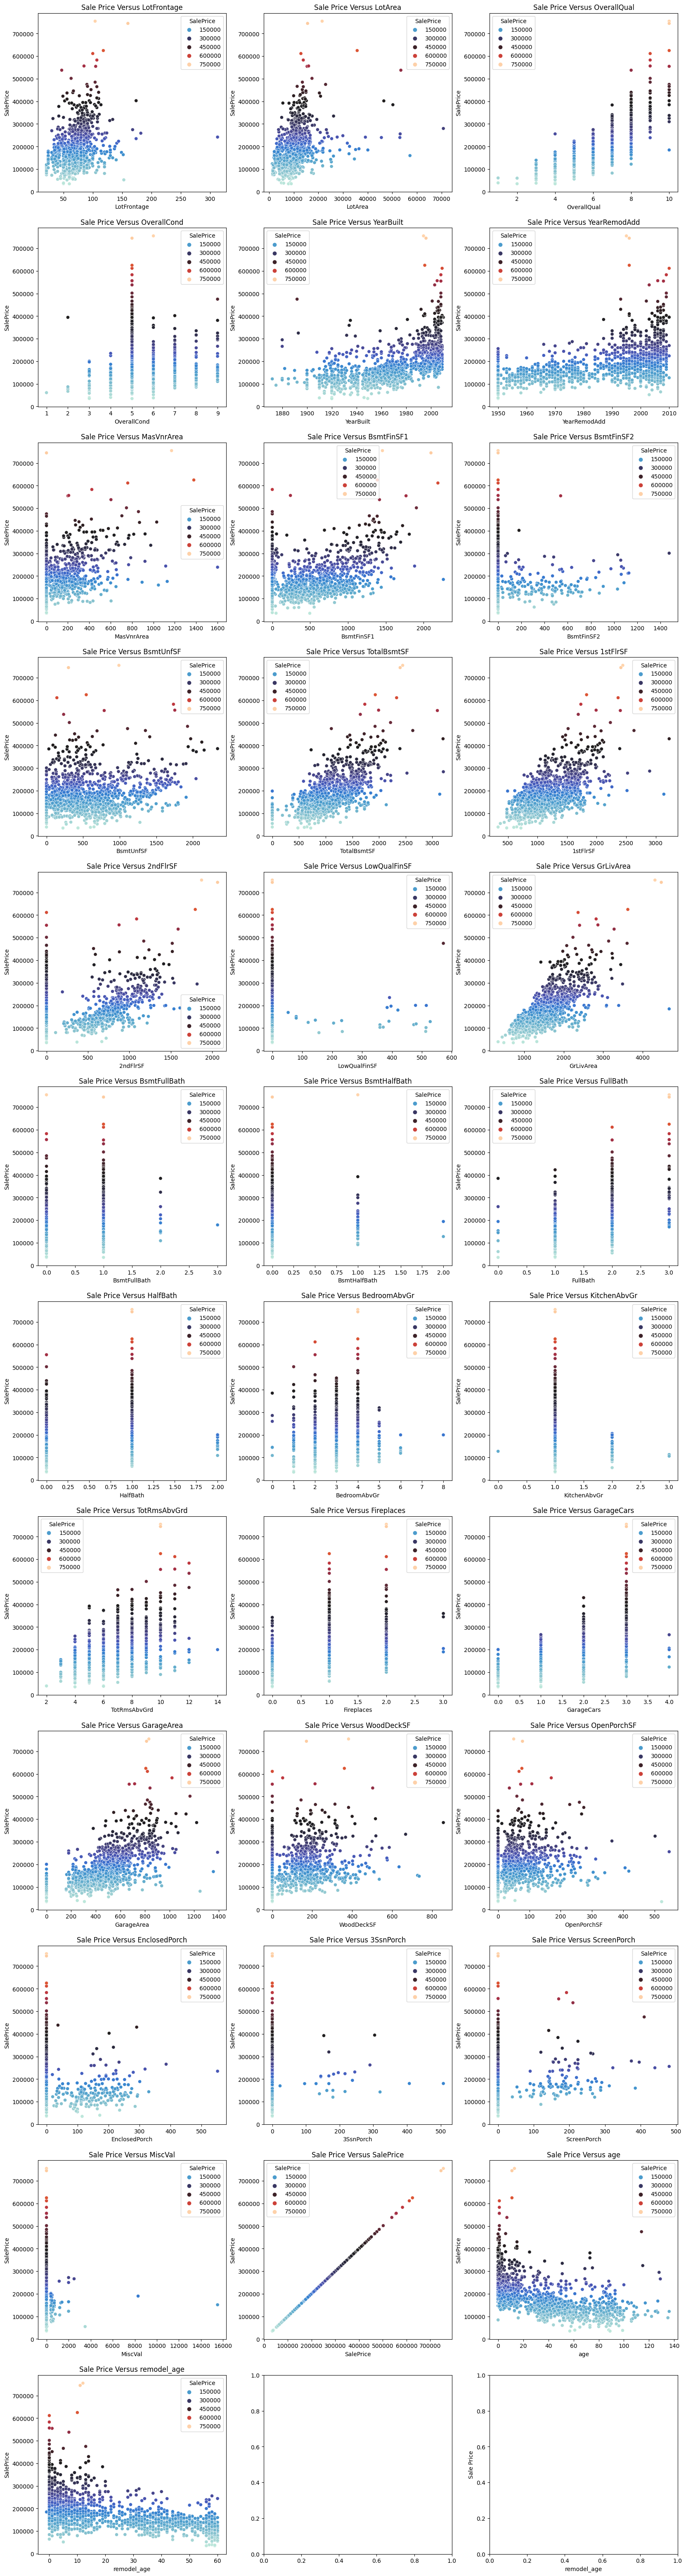

In [32]:
#Step - Data Visualization for Numerical fields Vs Target Variables
df_num1 = df1.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num1.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num1,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=10)
    plt.ylabel('Sale Price',fontsize=10)
    ax.set_title('Sale Price'+' Versus '+str(i))

In [33]:
#Observations:
#GRLiving Area has a direct proportional with the price of the property.
#Month sold has no effect on the price.
#New properties are costlier than older ones.
#Total basement area is linearly related with the total living area.
#And directly proportional to the price of the property.

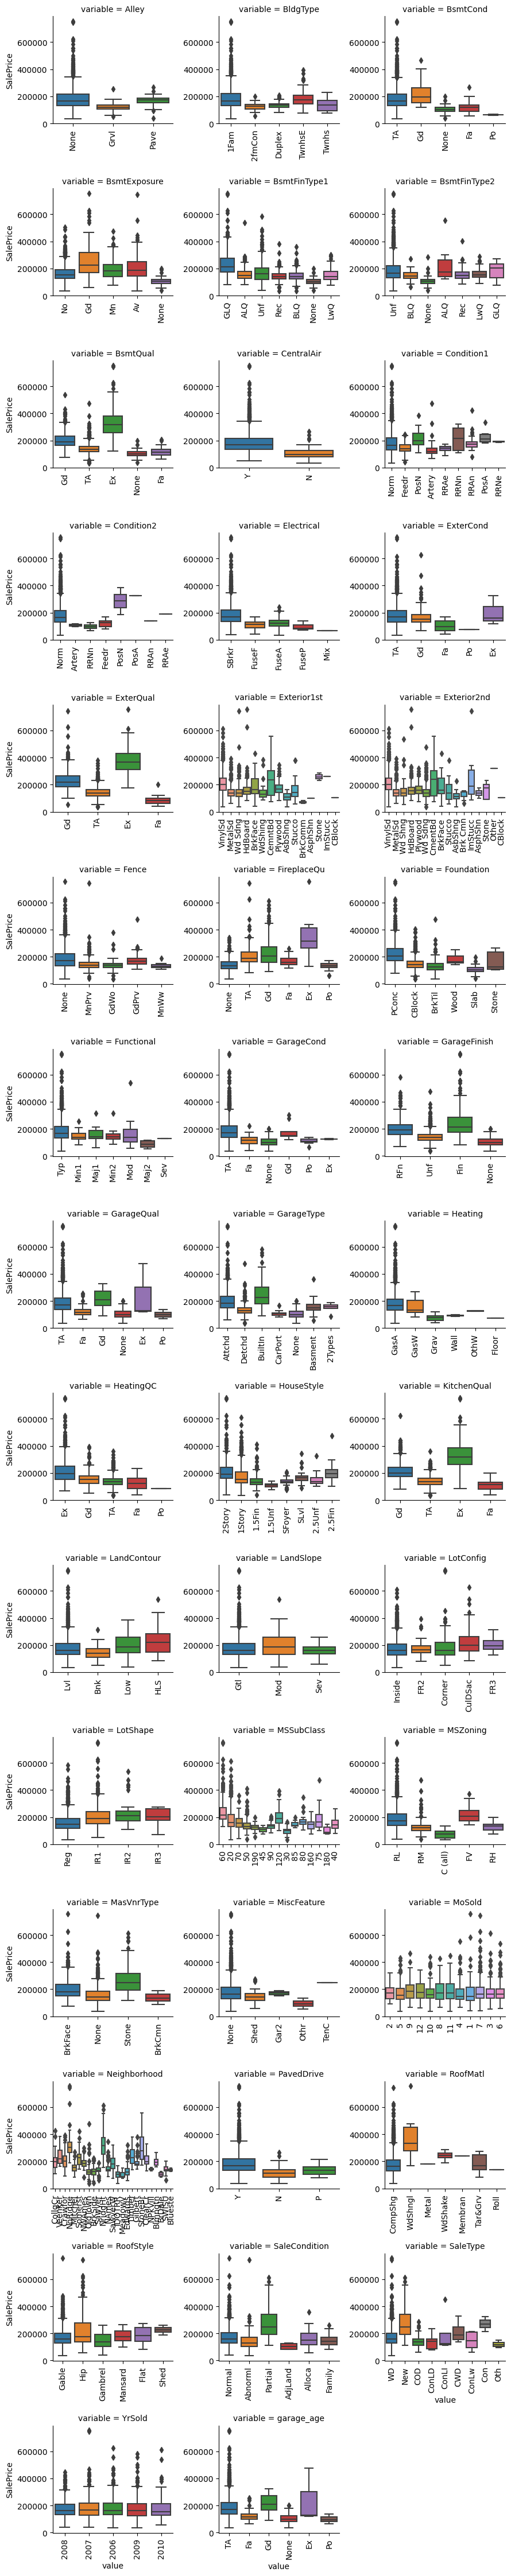

In [34]:
#Step - Data Visualization for Categorial fields Vs Target Variables
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical_cols = df1.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df1, id_vars=['SalePrice'], value_vars=sorted(df1[categorical_cols.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

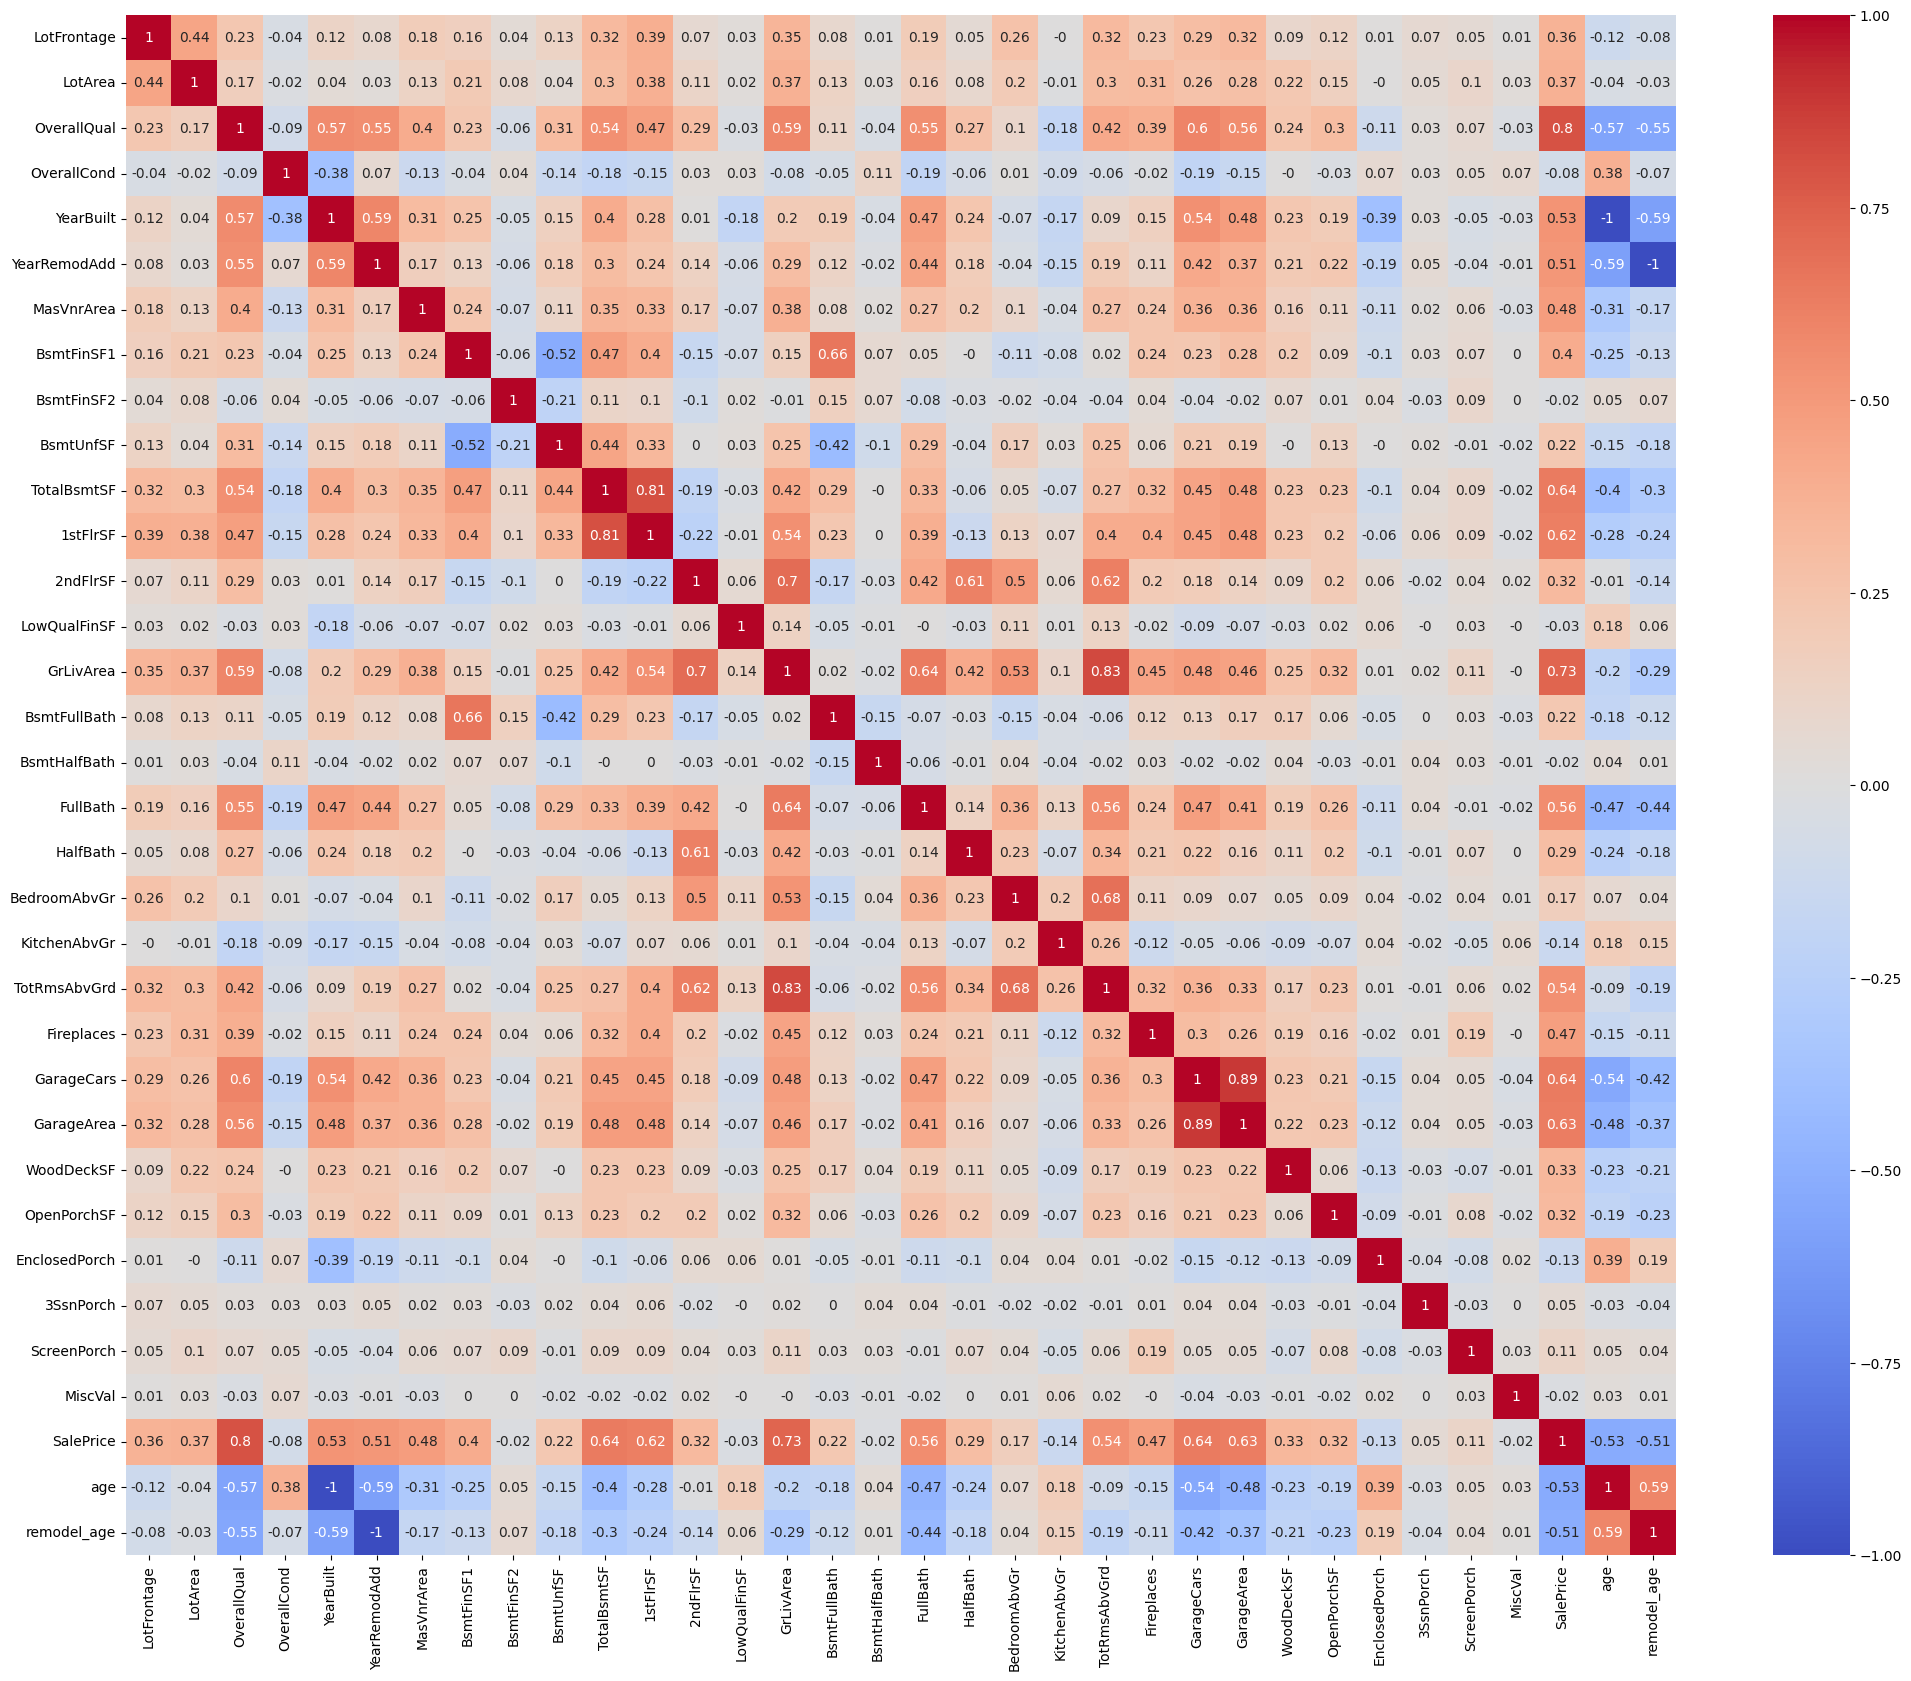

In [35]:
#Correlation Map between umerical fields
plt.subplots(figsize = (25,20))
sns.heatmap(round(df_num1.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [36]:
#Observation
##Garage Area and Garage Cars are highly correlated fields 

In [37]:
#Steps - Creation of Derived Columns

df1['Total_sqr_footage'] = (df1['BsmtFinSF1'] + df1['BsmtFinSF2'] + df1['1stFlrSF'] + df1['2ndFlrSF'])
df1['Total_porch_sf'] = (df1['OpenPorchSF'] + df1['3SsnPorch'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['WoodDeckSF'])
df1['YrBltAndRemod']=df1['YearBuilt']+df1['YearRemodAdd']
df1['Total_Bathrooms'] = (df1['FullBath'] + (0.5 * df1['HalfBath']) + df1['BsmtFullBath'] + (0.5 * df1['BsmtHalfBath']))

In [38]:
#Steps - Creation of Dummy Variables 
num_col1=[]
cat_col1=[]
for i in df1.columns:
    if df1[i].dtypes != 'O':
        num_col1.append(i)
    else:
        cat_col1.append(i)
df1_dummy= pd.get_dummies(df1[cat_col1])   
df1=pd.concat([df1,df1_dummy],axis=1)
df1= df1.drop(cat_col1,axis=1)   

In [39]:
df1.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd   
0         65.0     8450            7            5       2003          2003  \
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   
0       196.0         706           0        150          856       856  \
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath   
0       854             0       1710             1             0         2  \
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars   
0         1             3             1             8           0           2  \
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   
0         548           0           61              0          0            0  \
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  SalePrice  age  remodel_age  Total_sqr_footage  Total_porch_sf   
0        0     208500    5            5               2416              61  \
1        0     181500   31           31               2240             298   
2        0     223500    7            6               2272              42   
3        0     140000   91           36               1933             307   
4        0     250000    8            8               2853             276   

   YrBltAndRemod  Total_Bathrooms  MSSubClass_120  MSSubClass_160   
0           4006              3.5           False           False  \
1           3952              2.5           False           False   
2           4003              3.5           False           False   
3           3885              2.0           False           False   
4           4000              3.5           False           False   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30   
0           False           False          False          False  \
1           False           False           True          False   
2           False           False          False          False   
3           False           False          False          False   
4           False           False          False          False   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70   
0          False          False          False           True          False  \
1          False          False          False          False          False   
2          False          False          False           True          False   
3          False          False  

In [40]:
X = df1.drop('SalePrice',axis=1)
y = df1['SalePrice']

In [41]:

#  co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 = corr1
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

LotFrontage            LotFrontage              1.000000
LotArea                LotArea                  1.000000
OverallQual            OverallQual              1.000000
                       GarageCars               0.602025
                       YrBltAndRemod            0.628465
                       ExterQual_TA            -0.647338
OverallCond            OverallCond              1.000000
YearBuilt              YearBuilt                1.000000
                       age                     -0.999036
                       YrBltAndRemod            0.931280
                       Foundation_PConc         0.651122
                       BsmtQual_TA             -0.632578
YearRemodAdd           YearRemodAdd             1.000000
                       remodel_age             -0.997926
                       YrBltAndRemod            0.845788
MasVnrArea             MasVnrArea               1.000000
                       MasVnrType_None         -0.687465
BsmtFinSF1             BsmtFinS

In [42]:
#Removing the irrelvant fields from X
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [43]:
# Check the shape
X.shape

(1455, 234)

In [44]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

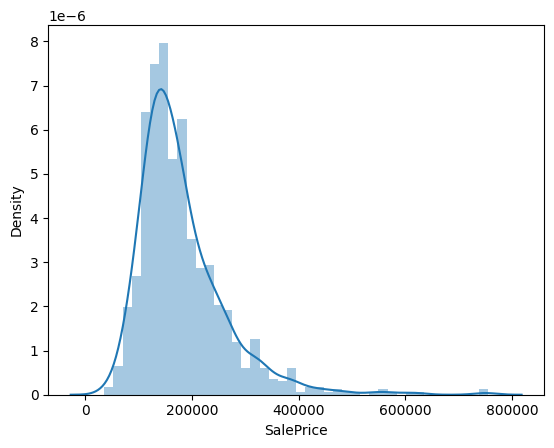

In [45]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [46]:
#Transforming the Target feature
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

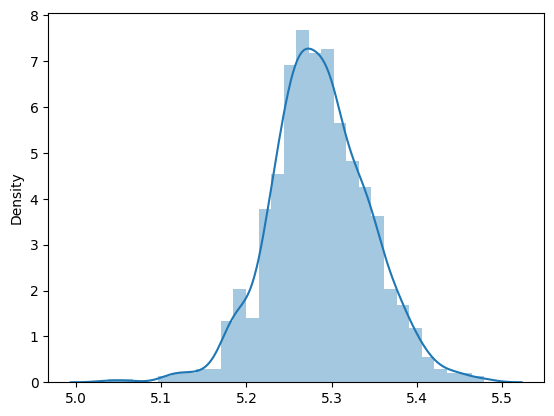

In [47]:
sns.distplot(y_train)
plt.show()

In [48]:
# Scaling the data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [49]:
#Check the rows of X_Train
X_train.head()

LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath   
0     0.047945  0.155161     0.428571           0.0           0.0  \
1     0.202055  0.524826     0.428571           0.0           0.0   
2     0.202055  0.158992     0.571429           0.0           0.5   
3     0.130137  0.125220     0.714286           0.0           0.0   
4     0.150685  0.224236     0.428571           0.0           0.0   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch   
0           1.0      0.090909    0.000000     0.000000            0.0  \
1           0.5      0.363636    0.396755     0.000000            0.0   
2           0.0      0.454545    0.278024     0.051188            0.0   
3           0.0      0.363636    0.280236     0.073126            0.0   
4           0.0      0.454545    0.473451     0.000000            0.0   

   3SsnPorch  ScreenPorch  MiscVal       age  remodel_age  Total_sqr_footage   
0        0.0     0.000000      0.0  0.227941     0.524590           0.217765  \
1        0.0     0.468750      0.0  0.308824     0.704918           0.407274   
2        0.0     0.370833      0.0  0.389706     0.213115           0.306275   
3        0.0     0.000000      0.0  0.117647     0.262295           0.162504   
4        0.0     0.000000      0.0  0.066176     0.163934           0.266313   

   Total_porch_sf  MSSubClass_180  MSSubClass_30  MSSubClass_40   
0        0.000000             0.0            0.0            0.0  \
1        0.692308             0.0            0.0            0.0   
2        0.200584             0.0            0.0            0.0   
3        0.038948             0.0            0.0            0.0   
4        0.000000             0.0            0.0            0.0   

   MSSubClass_70  MSZoning_C (all)  MSZoning_RH  MSZoning_RM  Alley_Pave   
0            0.0               0.0          0.0          0.0         0.0  \
1            0.0               0.0          0.0          0.0         0.0   
2            0.0               0.0          0.0          0.0         0.0   
3            0.0               0.0          0.0          0.0         0.0   
4            0.0               0.0          0.0          0.0         0.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low   
0           0.0           0.0           0.0              0.0              0.0  \
1           1.0           0.0           0.0              0.0              1.0   
2           0.0           0.0           1.0              0.0              0.0   
3           0.0           0.0           0.0              0.0              0.0   
4           0.0           0.0           0.0              0.0              0.0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3   
0              1.0                1.0            0.0            0.0  \
1              0.0                1.0            0.0            0.0   
2              1.0                0.0            0.0            0.0   
3              1.0                0.0            0.0            0.0   
4              1.0                0.0            0.0            0.0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn   
0               0.0            0.0            0.0                   0.0  \
1               0.0            0.0            1.0                   0.0   
2               1.0            0.0            0.0                   0.0   
3               1.0            0.0            0.0                   0.0   
4               0.0            0.0            0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide   
0                   0.0                  0.0                   0.0  \
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   Neighborhood_ClearC

In [50]:

#Use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization 


Fitting 11 folds for each of 28 candidates, totalling 308 fits


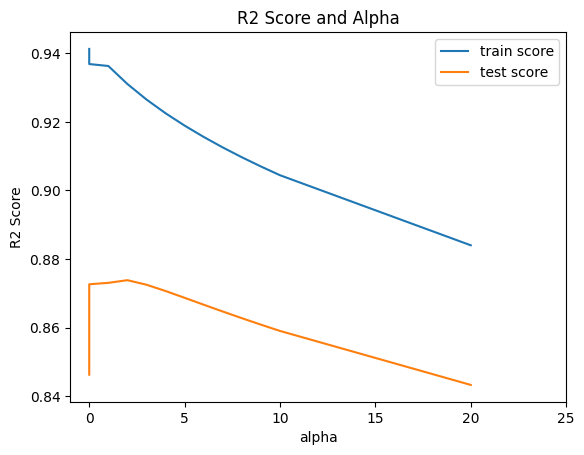

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8711555733160056
The MSE of the model on the test dataset for optimum alpha is 0.00038570626792147297


In [51]:
# list of alphas values 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]


folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [52]:
# VIF - RFE elimination
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features     VIF
233         garage_age_TA     inf
178      FireplaceQu_None     inf
188      GarageFinish_Unf     inf
187      GarageFinish_RFn     inf
186      GarageFinish_Fin     inf
102   Exterior1st_HdBoard     inf
101   Exterior1st_CemntBd     inf
99    Exterior1st_BrkFace     inf
98    Exterior1st_BrkComm     inf
97    Exterior1st_AsphShn     inf
96    Exterior1st_AsbShng     inf
141      BsmtFinType1_LwQ     inf
142      BsmtFinType1_Rec     inf
143      BsmtFinType1_Unf     inf
144      BsmtFinType2_ALQ     inf
145      BsmtFinType2_BLQ     inf
146      BsmtFinType2_GLQ     inf
147      BsmtFinType2_LwQ     inf
148     BsmtFinType2_None     inf
149      BsmtFinType2_Rec     inf
150      BsmtFinType2_Unf     inf
168       Functional_Maj1     inf
169       Functional_Maj2     inf
170       Functional_Min1     inf
171       Functional_Min2     inf
172        Functional_Mod     inf
174        Functional_Typ     inf
175        FireplaceQu_Ex     inf
176        FireplaceQu_Fa     inf
180        FireplaceQu_TA     inf
177        FireplaceQu_Gd     inf
104   Exterior1st_MetalSd     inf
200              MoSold_1     inf
201             MoSold_10     inf
105   Exterior1st_Plywood     inf
232         garage_age_Po     inf
231         garage_age_Gd     inf
230         garage_age_Fa     inf
138      BsmtFinType1_ALQ     inf
139      BsmtFinType1_BLQ     inf
229         garage_age_Ex     inf
216           YrSold_2010     inf
215           YrSold_2009     inf
214           YrSold_2008     inf
213           YrSold_2007     inf
140      BsmtFinType1_GLQ     inf
110   Exterior1st_WdShing     inf
109   Exterior1st_Wd Sdng     inf
212           YrSold_2006     inf
211              MoSold_9     inf
108   Exterior1st_VinylSd     inf
210              MoSold_8     inf
107    Exterior1st_Stucco     inf
209              MoSold_7     inf
208              MoSold_6     inf
106     Exterior1st_Stone     inf
207              MoSold_5     inf
206              MoSold_4     inf
205              MoSold_3     inf
204              MoSold_2     inf
203             MoSold_12     inf
202             MoSold_11     inf
179        FireplaceQu_Po     inf
137       BsmtExposure_No  240.01
134       BsmtExposure_Av  133.29
135       BsmtExposure_Gd   89.86
136       BsmtExposure_Mn   81.38
49     Neighborhood_NAmes   55.67
53   Neighborhood_OldTown   39.76
42   Neighborhood_CollgCr   39.68
44   Neighborhood_Edwards   30.09
57   Neighborhood_Somerst   27.47
45   Neighborhood_Gilbert   24.28
52   Neighborhood_NridgHt   21.55
55    Neighborhood_Sawyer   21.38
50    Neighborhood_NWAmes   19.61
43   Neighborhood_Crawfor   19.41
40   Neighborhood_BrkSide   18.86
56   Neighborhood_SawyerW   17.37
46    Neighborhood_IDOTRR   17.06
13                    age   15.78
48   Neighborhood_Mitchel   14.23
51   Neighborhood_NoRidge   13.05
59    Neighborhood_Timber   12.21
54     Neighborhood_SWISU   10.15

In [53]:
# Drop columns with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

In [54]:
#Observation 


Fitting 11 folds for each of 28 candidates, totalling 308 fits


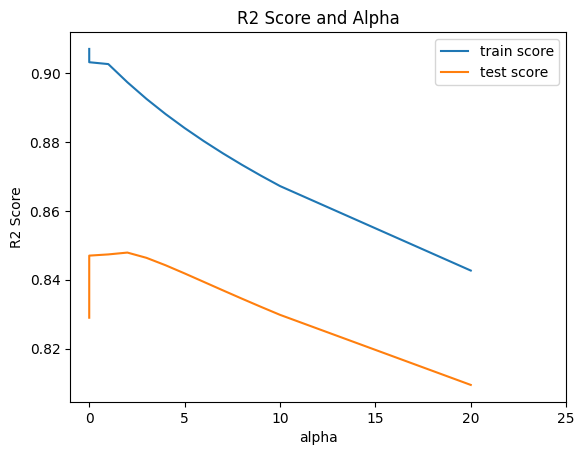

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8429540006184039
The MSE of the model on the test dataset for optimum alpha is 0.00047012996892785365


In [55]:
# Building Ridge Model 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [56]:
#Co-efficients
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
Total_sqr_footage               0.107290
GarageArea                      0.060016
TotRmsAbvGrd                    0.055534
OverallCond                     0.031072
SaleType_CWD                    0.026793
CentralAir_Y                    0.022028
SaleType_ConLD                  0.019839
Total_porch_sf                  0.018925
Condition2_Norm                 0.018785
RoofMatl_WdShngl                0.017527
LotFrontage                     0.016641
HouseStyle_2.5Unf               0.016258
KitchenQual_Ex                  0.014301
Heating_GasW                    0.014298
LotArea                         0.013787
PavedDrive_Y                    0.013762
SaleType_Con                    0.012998
MSSubClass_70                   0.012218
ScreenPorch                     0.011916
Neighborhood_Veenker            0.011746

In [57]:
#Lasso Method
# Lasso Model to check it's overall perfromance of the model

lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8449793096059022
The MSE of the model on the test dataset for optimum alpha is 0.00046406704179114696


Fitting 11 folds for each of 11 candidates, totalling 121 fits


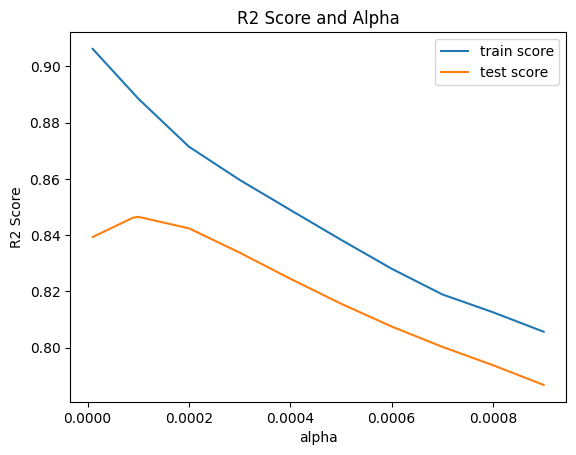

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.8449793096059022
The MSE of the model on the test dataset for optimum alpha is 0.00046406704179114696


In [58]:
# Building Lasso Model
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [59]:
#co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
Total_sqr_footage                0.153426
GarageArea                       0.062548
TotRmsAbvGrd                     0.047457
OverallCond                      0.028820
CentralAir_Y                     0.019930
Total_porch_sf                   0.017330
KitchenQual_Ex                   0.011972
BsmtQual_Ex                      0.010626
PavedDrive_Y                     0.009753
LandContour_HLS                  0.009594
MSSubClass_70                    0.009294
BsmtCond_TA                      0.008538
Condition1_Norm                  0.008249
ScreenPorch                      0.007934
Condition2_Norm                  0.007129
OpenPorchSF                      0.006706
ExterQual_Ex                     0.005733
MasVnrType_Stone                 0.005724
SaleCondition_Partial            0.005654
HouseStyle_2.5Unf                0.005517

In [60]:
ridge_final2

Ridge(alpha=2, random_state=100)

In [61]:
lasso_final2

Lasso(alpha=0.0001, random_state=100)

In [62]:
#Observation 
# Ridge & Lasso regression model have same R2 score = 0.83 and MSE = 0.0068
#Optimal value for ridge = 1 and for lasso = 0.0002.
#Below are Signifant variables 
#Total area in square foot
#Total Garage Area
#Total Rooms
#Overall Condition
#Lot Area
#Centrally Air Conditioned
#Total Porch Area (Open + closed)
#Neighborhood Areas (Stone Brook /Veenker)
#Paved Alley

In [63]:
# Problem II - Subjective Questions & Identifying the answers for the same
##1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model
#if you choose double the value of alpha for both ridge and lasso? 
#What will be the most important predictor variables after the change is implemented?
#Answer
#The Optimal value of alpha for 
#ridge = 1 
#lasso = 0.0002.

In [64]:
# Building Ridge Model by doubling the value of alpha to 2 
ridge_double = Ridge(alpha=2,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8429540006184039
The MSE of the model on the test dataset for doubled alpha is 0.00047012996892785365
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
Total_sqr_footage                             0.107290
GarageArea                                    0.060016
TotRmsAbvGrd                                  0.055534
OverallCond                                   0.031072
SaleType_CWD                                  0.026793
CentralAir_Y                                  0.022028
SaleType_ConLD                                0.019839
Total_porch_sf                                0.018925
Condition2_Norm                               0.018785
RoofMatl_WdShngl                              0.017527
LotFrontage                                   0.016641
HouseStyle_2.5Unf                             0.016258
KitchenQual_Ex                                0.014301
Heating_GasW                                  0.014298
LotArea                                       0.013787
PavedDrive_Y                                  0.013762
SaleType_Con                                  0.012998
MSSubClass_70                                 0.012218
ScreenPorch                                   0.011916
Neighborhood_Veenker                          0.011746

In [65]:
# Building Lasso Model by doubling the value of alpha to 0.0004 
lasso_double = Lasso(alpha=0.0004,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8250357876672206
The MSE of the model on the test dataset for doubled alpha is 0.0005237695963691979
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Total_sqr_footage                              0.132475
GarageArea                                     0.058255
TotRmsAbvGrd                                   0.049791
CentralAir_Y                                   0.019524
Total_porch_sf                                 0.017527
OverallCond                                    0.014271
BsmtQual_Ex                                    0.012965
KitchenQual_Ex                                 0.012207
PavedDrive_Y                                   0.008620
BsmtCond_TA                                    0.007456
Condition1_Norm                                0.006065
MasVnrType_Stone                               0.003999
MasVnrType_BrkFace                             0.003705
SaleCondition_Partial                          0.002879
MSSubClass_70                                  0.002578
ExterCond_TA                                   0.001414
HouseStyle_2Story                              0.000245
RoofStyle_Hip                                  0.000147
Exterior2nd_Wd Shng                           -0.000000
Foundation_Wood                               -0.000000

In [66]:
#Observation :
#Alpha value is small, doubling it doesnt have change in both the models 


In [67]:
#Question 3.After building the model, you realised that the five most important predictor variables in the lasso model 
#are not available in the incoming data.
#You will now have to create another model excluding the five most important predictor variables.
#Which are the five most important predictor variables now?
X_test_rfe3 = X_test_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','CentralAir_Y'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','CentralAir_Y'],axis=1)

In [68]:
# Building Lasso Model 
lasso3 = Lasso(alpha=0.0002,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7472587279941563
The MSE of the model on the test dataset is 0.0007566015487359045
The most important predictor variables are as follows:


Lasso Co-Efficient
LotArea                   0.061965
Total_porch_sf            0.040386
LotFrontage               0.033480
KitchenQual_Ex            0.024378
BsmtQual_Ex               0.022575